In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "Results/data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_data)
trial_df = pd.DataFrame(trial_data)
merge_data = mouse_df.merge(trial_df, on = "Mouse ID")

# Display the data table for preview
merge_data.head()

FileNotFoundError: [Errno 2] File b'/Results/data/mouse_drug_data.csv' does not exist: b'/Results/data/mouse_drug_data.csv'

## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
merge_data1 = merge_data.drop(columns = ["Mouse ID", "Metastatic Sites"])
tumor_grp= merge_data1.groupby(["Drug", "Timepoint"]).mean()
#Convert to DataFrame
# Preview DataFrame
tumor_grp.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
merge_data2 = merge_data.drop(columns = ["Mouse ID", "Metastatic Sites"])
tumor_grp1 = merge_data2.groupby(["Drug", "Timepoint"]).std()
# Convert to DataFrame
# Preview DataFrame
tumor_grp1.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    2.242964
          10                   3.513422
          15                   4.108369
          20                   4.362915

In [15]:
# Minor Data Munging to Re-Format the Data Frames
pivot = merge_data.drop(columns = ["Mouse ID", "Metastatic Sites"])
pivot_df = pivot.groupby(["Drug", "Timepoint"]).mean()
pivot_df = pivot_df.pivot(index=['Timepoint'], columns=['Drug'], values=['Tumor Volume (mm3)'])
# Preview that Reformatting worked
pivot_df

KeyError: "None of [Index(['Timepoint'], dtype='object')] are in the [columns]"

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


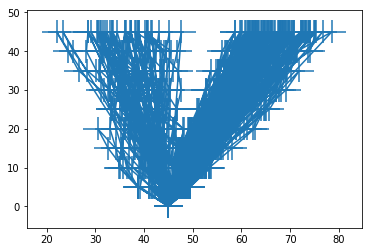

In [12]:
# Generate the Plot (with Error Bars)
y = pivot_df["Timepoint"]
err_plot_cap = plt.errorbar(pivot_df["Capomulin"], y, yerr = 3, xerr = 3)
err_plot_ceft = plt.errorbar(pivot_df["Ceftamin"], y, yerr = 3, xerr = 3)
err_plot_inf = plt.errorbar(pivot_df["Infubinol"], y, yerr = 3, xerr = 3)
err_plot_ket = plt.errorbar(pivot_df["Ketapril"], y, yerr = 3, xerr = 3)
err_plot_naft = plt.errorbar(pivot_df["Naftisol"], y, yerr = 3, xerr = 3)
err_plot_pla = plt.errorbar(pivot_df["Placebo"], y, yerr = 3, xerr = 3)
err_plot_prop = plt.errorbar(pivot_df["Propriva"], y, yerr = 3, xerr = 3)
err_plot_ram = plt.errorbar(pivot_df["Ramicane"], y, yerr = 3, xerr = 3)
err_plot_ste = plt.errorbar(pivot_df["Stelasyn"], y, yerr = 3, xerr = 3)
err_plot_zon = plt.errorbar(pivot_df["Zoniferol"], y, yerr = 3, xerr = 3)

# Save the Figure
plt.savefig("err_plot_1.png")


In [13]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


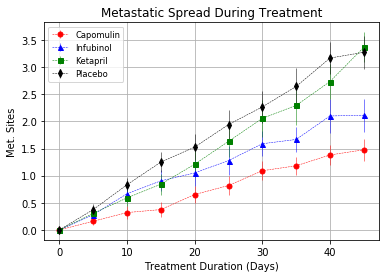

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

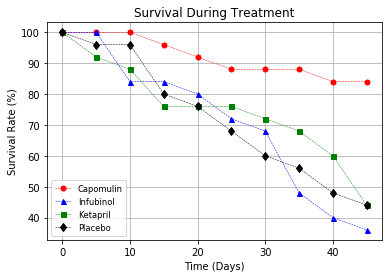

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

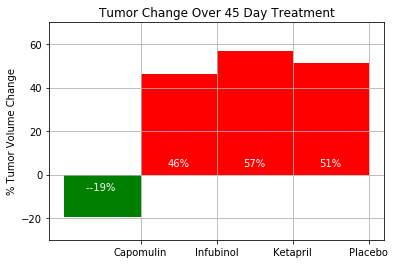